In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv('JNB-CPT May 2018.csv')

In [5]:
data.head()

,sessionid,date_time,region,departure,destination,depart_date,return_date,route,direction,regionality,...,teens,infants,source_type,source_code,company_code,dc_id,searchdate,insertdate,BookingId,BookingDate
0,0D006BA8482C0F5251DFADDD43E8FD9A,03:56.3,ZA,JNB,CPT,6/11/2018,6/14/2018,JNB-CPT,R,D,...,0,0,NaN,NaN,tszab2b,1,5/25/2018,5/27/2018,NaN,NaN
1,0EDD3A7F070F0156F080A6E36D7A753A,59:29.9,ZA,JNB,CPT,5/7/2018,NaN,JNB-CPT,OW,D,...,0,0,NaN,NaN,tszab2b,1,5/4/2018,5/6/2018,3905190.0,5/4/2018
2,10KIB4RI65D8G5V2S60PT455TD,29:16.6,ZA,CPT,JNB,7/20/2018,7/22/2018,JNB-CPT,R,D,...,0,0,NaN,NaN,zamicroapp,1,5/1/2018,5/3/2018,NaN,NaN
3,10QFDQ3VNCHOM9ERNHS9PM2Q9I,50:29.8,ZA,JNB,CPT,5/11/2018,5/11/2018,JNB-CPT,R,D,...,0,0,NaN,NaN,zamicroapp,1,5/9/2018,5/11/2018,NaN,NaN
4,14PL10HLTENOIGGCVSRDGVOI16,22:18.8,ZA,JNB,CPT,5/9/2018,5/10/2018,JNB-CPT,R,D,...,0,0,NaN,NaN,bookeucomza,1,5/8/2018,5/10/2018,NaN,NaN


In [6]:
print(data.shape)

(192950, 22)


In [7]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values = missing_values_table(data)
missing_values.head(20)

# Columns with no booking id and data = not converted

Your selected dataframe has 22 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
BookingId,175350,90.9
BookingDate,175350,90.9
source_type,90562,46.9
source_code,90562,46.9
return_date,58132,30.1
regionality,3,0.0


In [9]:
# Feature Engineering

In [10]:
# Convert searchdates to readable form

searchdate2 = pd.to_datetime(data['searchdate'])

In [11]:
searchdate2.head()

0   2018-05-25
1   2018-05-04
2   2018-05-01
3   2018-05-09
4   2018-05-08
Name: searchdate, dtype: datetime64[ns]

In [12]:
# Convert searchdates to integers depending on the day of the week

searchdate3 = searchdate2.dt.dayofweek

In [13]:
# Converting the integers to english words

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

data['search_day_of_week'] = searchdate3.apply(lambda x: days[x])

In [14]:
# Check

data['search_day_of_week'].head()

0     Fri
1     Fri
2    Tues
3    Weds
4    Tues
Name: search_day_of_week, dtype: object

0    0
1    1
2    0
3    0
4    0
Name: Booking, dtype: int64


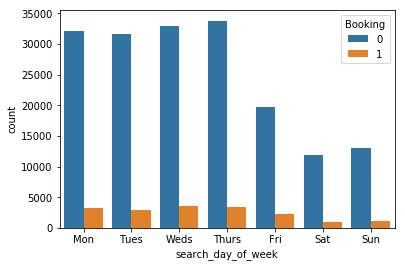

In [15]:
# Visualisation of Data 

# Distribution of searches across weekdays with the number of conversions indicated

k = ['Mon','Tues','Weds','Thurs','Fri','Sat','Sun']

data['Booking'] = data['BookingId'].apply(lambda x: 1 if not pd.isnull(x) else 0)

print(data['Booking'].head())

plot1 = sns.countplot(x = 'search_day_of_week', hue = 'Booking', data=data, order = k)

In [16]:
data.head()

,sessionid,date_time,region,departure,destination,depart_date,return_date,route,direction,regionality,...,source_type,source_code,company_code,dc_id,searchdate,insertdate,BookingId,BookingDate,search_day_of_week,Booking
0,0D006BA8482C0F5251DFADDD43E8FD9A,03:56.3,ZA,JNB,CPT,6/11/2018,6/14/2018,JNB-CPT,R,D,...,NaN,NaN,tszab2b,1,5/25/2018,5/27/2018,NaN,NaN,Fri,0
1,0EDD3A7F070F0156F080A6E36D7A753A,59:29.9,ZA,JNB,CPT,5/7/2018,NaN,JNB-CPT,OW,D,...,NaN,NaN,tszab2b,1,5/4/2018,5/6/2018,3905190.0,5/4/2018,Fri,1
2,10KIB4RI65D8G5V2S60PT455TD,29:16.6,ZA,CPT,JNB,7/20/2018,7/22/2018,JNB-CPT,R,D,...,NaN,NaN,zamicroapp,1,5/1/2018,5/3/2018,NaN,NaN,Tues,0
3,10QFDQ3VNCHOM9ERNHS9PM2Q9I,50:29.8,ZA,JNB,CPT,5/11/2018,5/11/2018,JNB-CPT,R,D,...,NaN,NaN,zamicroapp,1,5/9/2018,5/11/2018,NaN,NaN,Weds,0
4,14PL10HLTENOIGGCVSRDGVOI16,22:18.8,ZA,JNB,CPT,5/9/2018,5/10/2018,JNB-CPT,R,D,...,NaN,NaN,bookeucomza,1,5/8/2018,5/10/2018,NaN,NaN,Tues,0


In [17]:
data.columns

Index(['sessionid', 'date_time', 'region', 'departure', 'destination',
       'depart_date', 'return_date', 'route', 'direction', 'regionality',
       'adults', 'children', 'teens', 'infants', 'source_type', 'source_code',
       'company_code', 'dc_id', 'searchdate', 'insertdate', 'BookingId',
       'BookingDate', 'search_day_of_week', 'Booking'],
      dtype='object')

In [18]:
data['group_size'] = data['adults'] + data['children'] + data['teens'] + data['infants']

In [19]:
data['searchdate2'] = pd.to_datetime(data['searchdate'])
data['departdate2'] = pd.to_datetime(data['depart_date'])
data['returndate2'] = pd.to_datetime(data['return_date'])

In [20]:
data['search_depart_diff'] = data['departdate2'] - data['searchdate2']

In [21]:
data['trip_duration'] = data['returndate2'] - data['departdate2']

In [22]:
data['search_depart_diff'].head()

0   17 days
1    3 days
2   80 days
3    2 days
4    1 days
Name: search_depart_diff, dtype: timedelta64[ns]

In [23]:
# Create new dataframe with the most important features

print(data.shape)

df = data[['search_day_of_week','search_depart_diff','group_size','trip_duration','source_type','Booking']]

(192950, 30)


In [24]:
print(df.shape)

(192950, 6)


In [25]:
df.head()

,search_day_of_week,search_depart_diff,group_size,trip_duration,source_type,Booking
0,Fri,17 days,1,3 days,NaN,0
1,Fri,3 days,1,NaT,NaN,1
2,Tues,80 days,1,2 days,NaN,0
3,Weds,2 days,1,0 days,NaN,0
4,Tues,1 days,1,1 days,NaN,0


In [26]:
data.shape

(192950, 30)

In [27]:
df.head()

,search_day_of_week,search_depart_diff,group_size,trip_duration,source_type,Booking
0,Fri,17 days,1,3 days,NaN,0
1,Fri,3 days,1,NaT,NaN,1
2,Tues,80 days,1,2 days,NaN,0
3,Weds,2 days,1,0 days,NaN,0
4,Tues,1 days,1,1 days,NaN,0


In [28]:
df.columns

Index(['search_day_of_week', 'search_depart_diff', 'group_size',
       'trip_duration', 'source_type', 'Booking'],
      dtype='object')

In [29]:
df['source_type']=df['source_type'].fillna('UNKNOWN')

df.source_type.nunique()
df.source_type.value_counts()

/home/nicholas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


UNKNOWN           90562
TRAVELSTART       42634
EMAIL             23976
SEARCH_PAID       21269
REMARKETING        4196
AFFILIATE          2948
SMS                2375
PARTNERSHIP        1605
CPC_CAMPAIGNS      1502
SOCIAL_ORGANIC      706
DISPLAY             526
SOCIAL_PAID         450
MOBILE               92
GDN                  85
B2B                  24
Name: source_type, dtype: int64

In [30]:
df.head()

,search_day_of_week,search_depart_diff,group_size,trip_duration,source_type,Booking
0,Fri,17 days,1,3 days,UNKNOWN,0
1,Fri,3 days,1,NaT,UNKNOWN,1
2,Tues,80 days,1,2 days,UNKNOWN,0
3,Weds,2 days,1,0 days,UNKNOWN,0
4,Tues,1 days,1,1 days,UNKNOWN,0


In [31]:
df.columns

Index(['search_day_of_week', 'search_depart_diff', 'group_size',
       'trip_duration', 'source_type', 'Booking'],
      dtype='object')

In [32]:
# One Hot Encode

categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns= categorical_columns, dummy_na= False)

In [33]:
df.head()

,search_depart_diff,group_size,trip_duration,Booking,search_day_of_week_Fri,search_day_of_week_Mon,search_day_of_week_Sat,search_day_of_week_Sun,search_day_of_week_Thurs,search_day_of_week_Tues,...,source_type_GDN,source_type_MOBILE,source_type_PARTNERSHIP,source_type_REMARKETING,source_type_SEARCH_PAID,source_type_SMS,source_type_SOCIAL_ORGANIC,source_type_SOCIAL_PAID,source_type_TRAVELSTART,source_type_UNKNOWN
0,17 days,1,3 days,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3 days,1,NaT,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,80 days,1,2 days,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2 days,1,0 days,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1 days,1,1 days,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df['search_depart_diff']

0         17 days
1          3 days
2         80 days
3          2 days
4          1 days
5          5 days
6          3 days
7          3 days
8         20 days
9          7 days
10         7 days
11         1 days
12         3 days
13        48 days
14         0 days
15         7 days
16       162 days
17        50 days
18         7 days
19       161 days
20         7 days
21         7 days
22         7 days
23        87 days
24         7 days
25         7 days
26         3 days
27         7 days
28        32 days
29         2 days
           ...   
192920    37 days
192921     9 days
192922     3 days
192923     1 days
192924     7 days
192925    14 days
192926     6 days
192927     3 days
192928    45 days
192929   161 days
192930    38 days
192931     8 days
192932     9 days
192933     2 days
192934     4 days
192935     1 days
192936    54 days
192937    13 days
192938     2 days
192939     7 days
192940     4 days
192941    32 days
192942     0 days
192943    11 days
192944   2

In [35]:
df['search_depart_diff'] = df['search_depart_diff'].astype('timedelta64[D]') 

In [36]:
df.head()

,search_depart_diff,group_size,trip_duration,Booking,search_day_of_week_Fri,search_day_of_week_Mon,search_day_of_week_Sat,search_day_of_week_Sun,search_day_of_week_Thurs,search_day_of_week_Tues,...,source_type_GDN,source_type_MOBILE,source_type_PARTNERSHIP,source_type_REMARKETING,source_type_SEARCH_PAID,source_type_SMS,source_type_SOCIAL_ORGANIC,source_type_SOCIAL_PAID,source_type_TRAVELSTART,source_type_UNKNOWN
0,17.0,1,3 days,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.0,1,NaT,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,80.0,1,2 days,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1,0 days,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,1,1 days,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df['trip_duration'] = df['trip_duration'].astype('timedelta64[D]') 

In [38]:
df.head()

,search_depart_diff,group_size,trip_duration,Booking,search_day_of_week_Fri,search_day_of_week_Mon,search_day_of_week_Sat,search_day_of_week_Sun,search_day_of_week_Thurs,search_day_of_week_Tues,...,source_type_GDN,source_type_MOBILE,source_type_PARTNERSHIP,source_type_REMARKETING,source_type_SEARCH_PAID,source_type_SMS,source_type_SOCIAL_ORGANIC,source_type_SOCIAL_PAID,source_type_TRAVELSTART,source_type_UNKNOWN
0,17.0,1,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.0,1,NaN,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,80.0,1,2.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,1,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [39]:
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 26 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
trip_duration,58132,30.1


In [40]:
df['trip_duration'] = df['trip_duration'].fillna((df['trip_duration'].mean()))


In [41]:
df.head()

,search_depart_diff,group_size,trip_duration,Booking,search_day_of_week_Fri,search_day_of_week_Mon,search_day_of_week_Sat,search_day_of_week_Sun,search_day_of_week_Thurs,search_day_of_week_Tues,...,source_type_GDN,source_type_MOBILE,source_type_PARTNERSHIP,source_type_REMARKETING,source_type_SEARCH_PAID,source_type_SMS,source_type_SOCIAL_ORGANIC,source_type_SOCIAL_PAID,source_type_TRAVELSTART,source_type_UNKNOWN
0,17.0,1,3.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.0,1,5.527066,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,80.0,1,2.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,1,1.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
import numpy as np
from sklearn.model_selection import train_test_split


In [43]:
# Train Test Split

y = df['Booking']
X = df.iloc[:,4:]
X['search_depart_diff'] = df['search_depart_diff']
X['group_size'] = df['group_size']
X['trip_duration'] = df['trip_duration']

In [44]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Booking, dtype: int64

In [45]:
X.head()

,search_day_of_week_Fri,search_day_of_week_Mon,search_day_of_week_Sat,search_day_of_week_Sun,search_day_of_week_Thurs,search_day_of_week_Tues,search_day_of_week_Weds,source_type_AFFILIATE,source_type_B2B,source_type_CPC_CAMPAIGNS,...,source_type_REMARKETING,source_type_SEARCH_PAID,source_type_SMS,source_type_SOCIAL_ORGANIC,source_type_SOCIAL_PAID,source_type_TRAVELSTART,source_type_UNKNOWN,search_depart_diff,group_size,trip_duration
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,17.0,1,3.000000
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3.0,1,5.527066
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,80.0,1,2.000000
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,2.0,1,0.000000
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1.0,1,1.000000


In [46]:
X.shape

(192950, 25)

In [47]:
y.shape

(192950,)

In [48]:
X_train = X.iloc[:154359,:]
X_test = X.iloc[154359:,:]


In [49]:
y_train = y.iloc[:154359]
y_test = y.iloc[154359:]

In [50]:
X_train.shape

(154359, 25)

In [51]:
X_test.shape

(38591, 25)

In [52]:
y_train.shape

(154359,)

In [53]:
y_test.shape

(38591,)

In [54]:
X.shape

(192950, 25)

In [55]:
X_train.head()

,search_day_of_week_Fri,search_day_of_week_Mon,search_day_of_week_Sat,search_day_of_week_Sun,search_day_of_week_Thurs,search_day_of_week_Tues,search_day_of_week_Weds,source_type_AFFILIATE,source_type_B2B,source_type_CPC_CAMPAIGNS,...,source_type_REMARKETING,source_type_SEARCH_PAID,source_type_SMS,source_type_SOCIAL_ORGANIC,source_type_SOCIAL_PAID,source_type_TRAVELSTART,source_type_UNKNOWN,search_depart_diff,group_size,trip_duration
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,17.0,1,3.000000
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3.0,1,5.527066
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,80.0,1,2.000000
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,2.0,1,0.000000
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1.0,1,1.000000


In [56]:
y_train.head()

0    0
1    1
2    0
3    0
4    0
Name: Booking, dtype: int64

In [57]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [58]:
clf = XGBClassifier(learning_rate =0.05,
n_estimators=200,
max_depth=3, 
min_child_weight=4,
subsample=0.8, 
colsample_bytree=0.8,
objective= 'binary:logistic', 
nthread=4,
scale_pos_weight=2, 
seed=27)

In [59]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=200,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=27, silent=True,
       subsample=0.8)

In [60]:
print(clf.predict_proba(X_test))

[[0.9484388  0.0515612 ]
 [0.8338694  0.16613062]
 [0.7934276  0.20657241]
 ...
 [0.7922975  0.20770252]
 [0.9306948  0.0693052 ]
 [0.9128646  0.0871354 ]]


In [61]:
predictions = clf.predict_proba(X_test)[:, 1]

In [62]:
predictions

array([0.0515612 , 0.16613062, 0.20657241, ..., 0.20770252, 0.0693052 ,
       0.0871354 ], dtype=float32)

In [63]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
print('Best eval model score:', roc_auc_score(y_test,predictions))

Best eval model score: 0.687848707511168


In [66]:
predictions2 = [round(value) for value in predictions]

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.84%
